# Segmentation de la clientèle d'une entreprise par des algorithmes d'apprentissage non supervisé

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from scipy.stats import pearsonr
from sklearn.cluster import KMeans
#!pip install -U yellowbrick
from yellowbrick.cluster import KElbowVisualizer

/Users/abbasmzehamadi/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Les données que nous utiliserons proviennent de **UCI Machine Learning**. L'ensemble de données comprend les dépenses annuelles pour différents type de produits de vente au détail (par exemples surgelés, épicerie, épicerie fine, etc)

In [3]:
# importation des données

df = pd.read_csv("/Users/abbasmzehamadi/Downloads/Wholesale customers data.csv")

In [4]:
# cinq premières lignes

df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


Consultez la documentation sur les données afin de bien comprendre la signfication des variables : 
https://archive.ics.uci.edu/dataset/292/wholesale+customers.

<Axes: xlabel='Channel'>

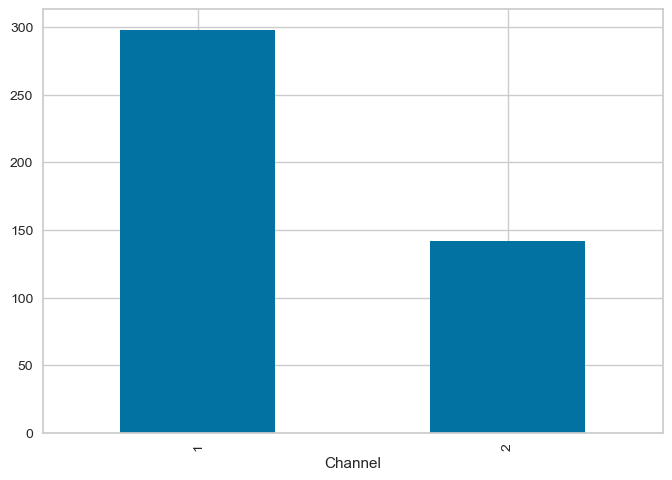

In [5]:
# Types de distribution

df['Channel'].value_counts().plot(kind ='bar')

<Axes: xlabel='Region'>

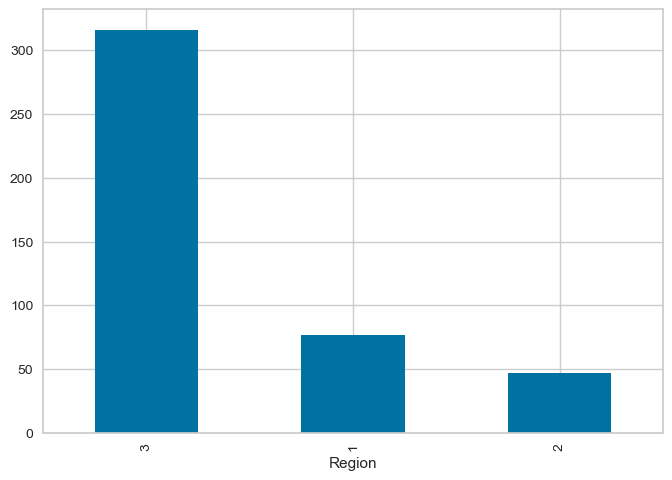

In [6]:
# Régions

df['Region'].value_counts().plot(kind ='bar')

In [7]:
# Quelques changements de nom de variable et de modalités

df = df.rename(columns={'Delicassen': 'Delicatessen'}) #Delicatessen : épicerie fine

df['Channel'] = df['Channel'].map({1: 'HoReCa', 2: 'Retail'}) # Retail : Vente au détail, HoReCa : Hotel, Restaurant et Café

df['Region'] = df['Region'].map({1: 'Lisbon', 2: 'Porto', 3: 'Other'}) # Retail : Vente au détail

In [8]:
df.sample(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
19,HoReCa,Other,7780,2495,9464,669,2518,501
219,HoReCa,Lisbon,4155,367,1390,2306,86,130
101,Retail,Other,1420,10810,16267,1593,6766,1838
24,Retail,Other,22647,9776,13792,2915,4482,5778
177,HoReCa,Other,12759,7330,4533,1752,20,2631
431,HoReCa,Other,8533,5506,5160,13486,1377,1498
341,Retail,Other,2320,5763,11238,767,5162,2158
434,HoReCa,Other,16731,3922,7994,688,2371,838
263,HoReCa,Lisbon,2153,1115,6684,4324,2894,411
14,Retail,Other,24653,9465,12091,294,5058,2168


In [9]:
# Table de fréquence de la variable 'Region'

df['Region'].value_counts()

Region
Other     316
Lisbon     77
Porto      47
Name: count, dtype: int64

In [10]:
# Table de fréquence normalisée

df['Region'].value_counts(normalize = True)

Region
Other     0.718182
Lisbon    0.175000
Porto     0.106818
Name: proportion, dtype: float64

In [11]:
# Stockage des noms des colonnes dans une liste

features = df.columns.tolist()
features

['Channel',
 'Region',
 'Fresh',
 'Milk',
 'Grocery',
 'Frozen',
 'Detergents_Paper',
 'Delicatessen']

In [12]:
# Résumé statistique

df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [13]:
# Structure de la dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Channel           440 non-null    object
 1   Region            440 non-null    object
 2   Fresh             440 non-null    int64 
 3   Milk              440 non-null    int64 
 4   Grocery           440 non-null    int64 
 5   Frozen            440 non-null    int64 
 6   Detergents_Paper  440 non-null    int64 
 7   Delicatessen      440 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 27.6+ KB


### Visualisation des données

In [14]:
features

['Channel',
 'Region',
 'Fresh',
 'Milk',
 'Grocery',
 'Frozen',
 'Detergents_Paper',
 'Delicatessen']

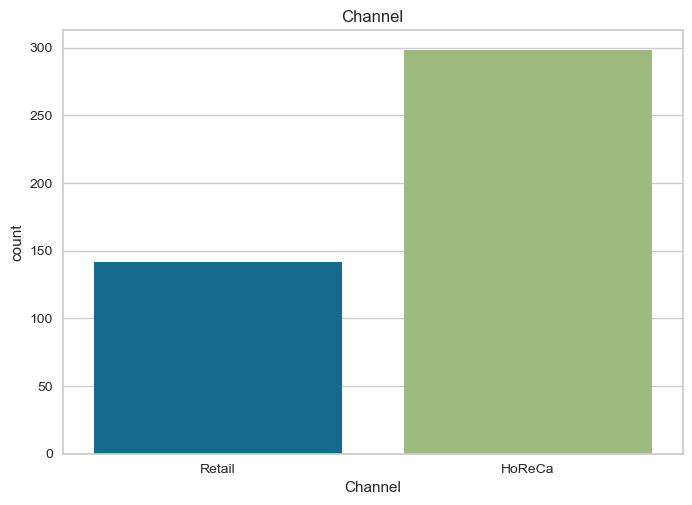

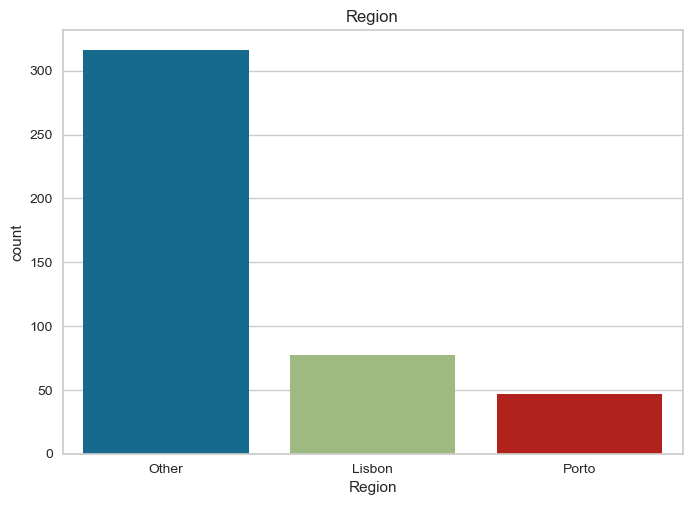

/Users/abbasmzehamadi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


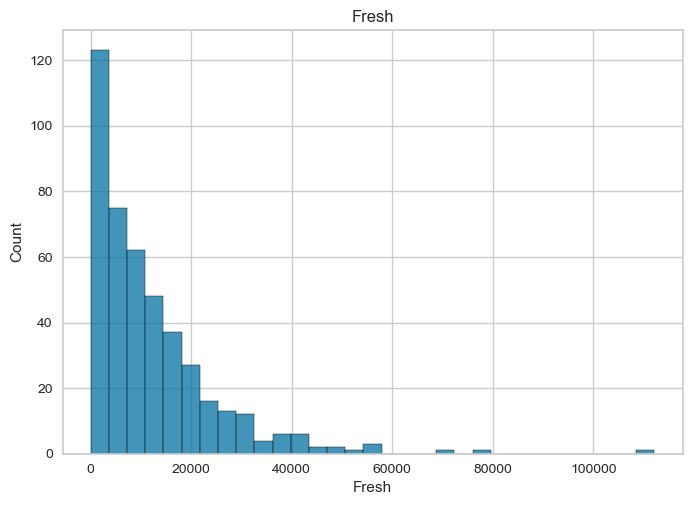

/Users/abbasmzehamadi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


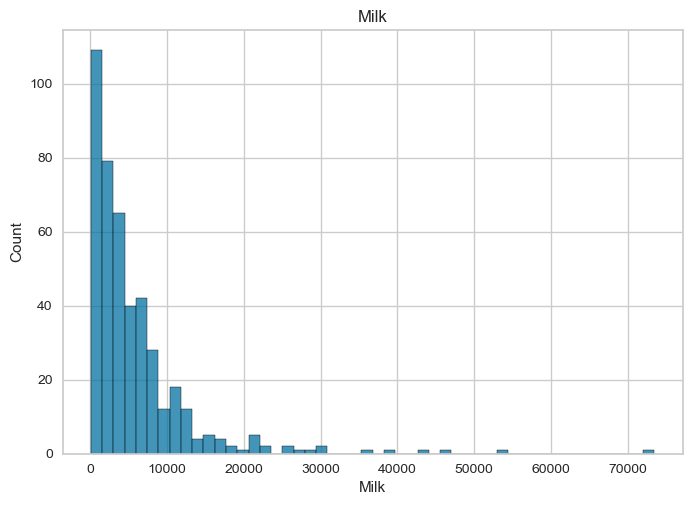

/Users/abbasmzehamadi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


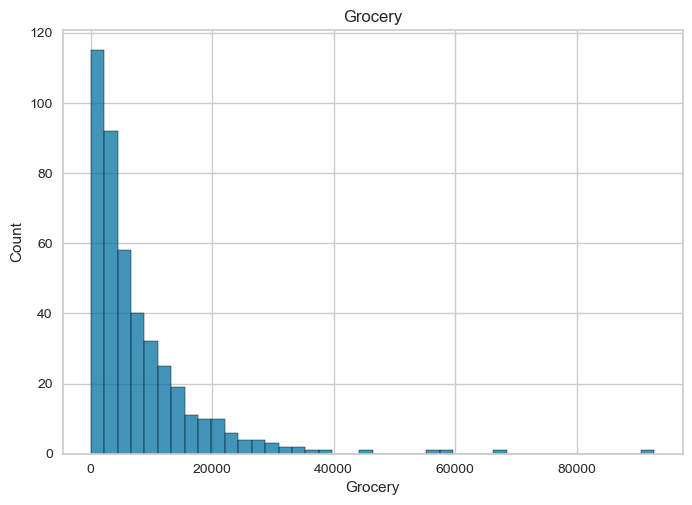

/Users/abbasmzehamadi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


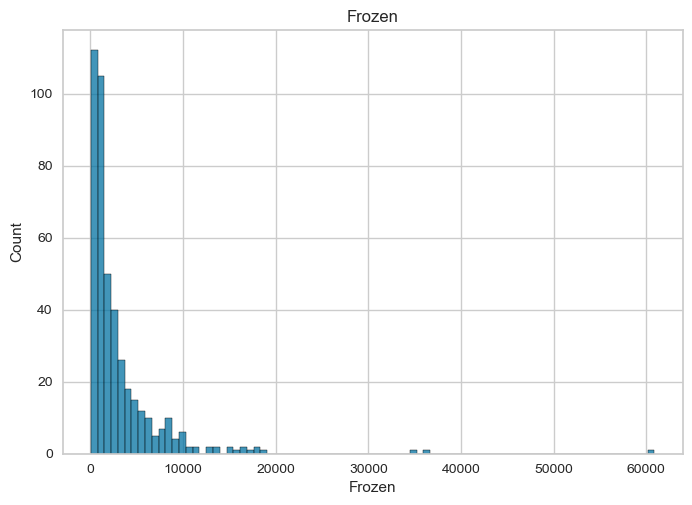

/Users/abbasmzehamadi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


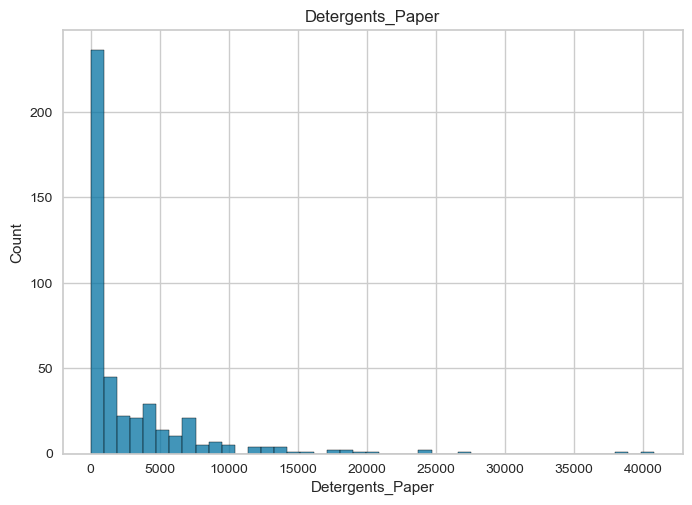

/Users/abbasmzehamadi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


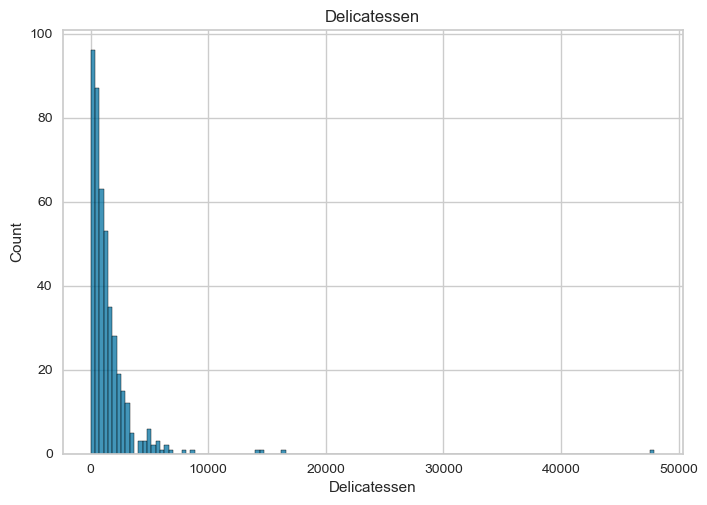

In [15]:
# Diagrammes à barrres et Histogrammes

for feature in features:
    if (feature == 'Channel') | (feature == 'Region'):
        sns.countplot(x=df[feature]).set_title(feature)
        plt.show()
    else:
        sns.histplot(df[feature]).set_title(feature)
        plt.show()

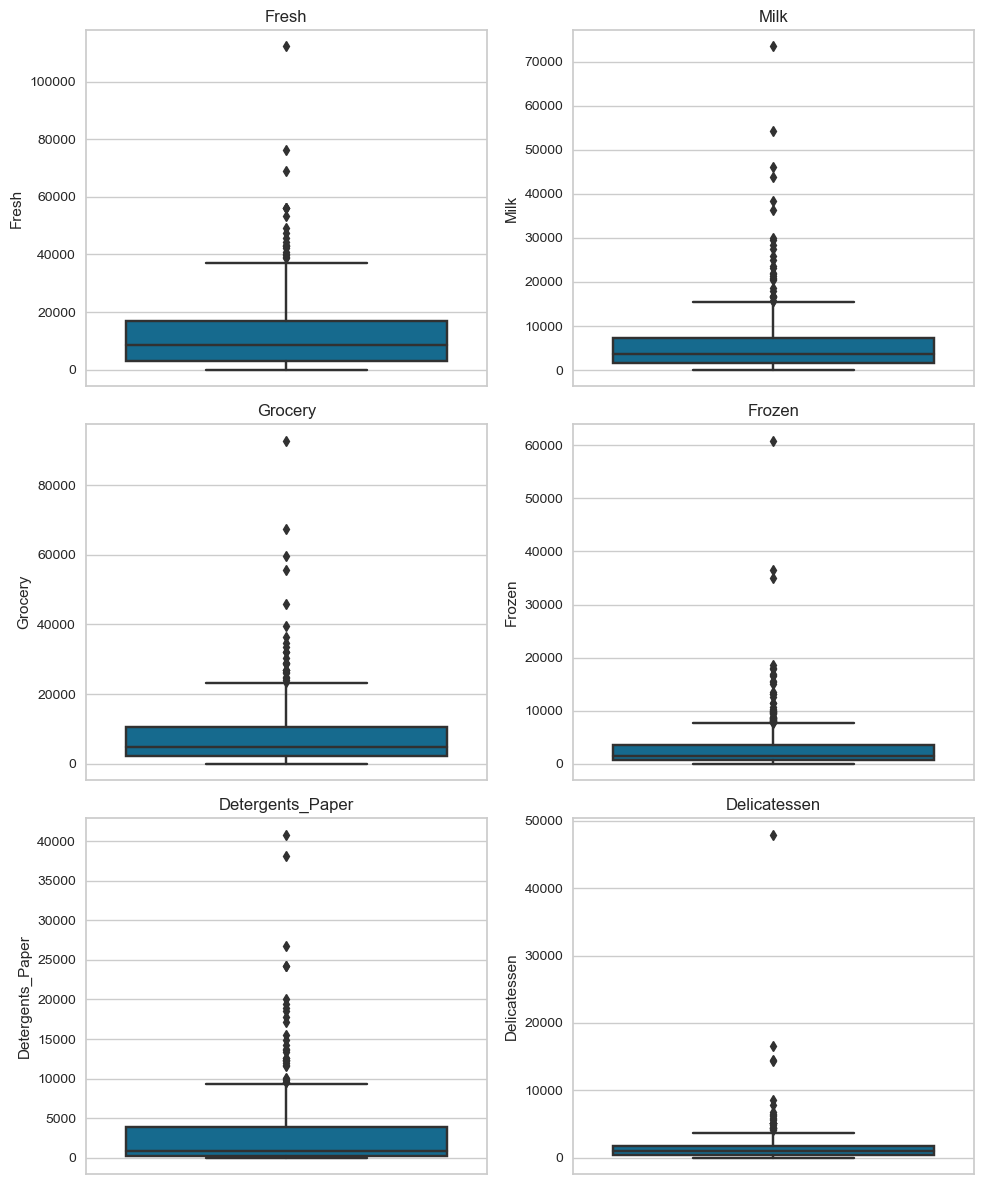

In [16]:


# Sélectionner uniquement les colonnes numériques
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Créer un boxplot pour chaque colonne numérique
num_cols = len(df_numeric.columns)

# Nombre de lignes pour les sous-graphiques
num_rows = num_cols // 2
if num_cols % 2:
    num_rows += 1

plt.figure(figsize=(10, 4 * num_rows))
for i, column in enumerate(df_numeric.columns, start=1):
    plt.subplot(num_rows, 2, i)
    sns.boxplot(y=df_numeric[column])
    plt.title(column)

plt.tight_layout()
plt.show()

# Analyse bivariés

/Users/abbasmzehamadi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/abbasmzehamadi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/abbasmzehamadi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/abbasmzehamadi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

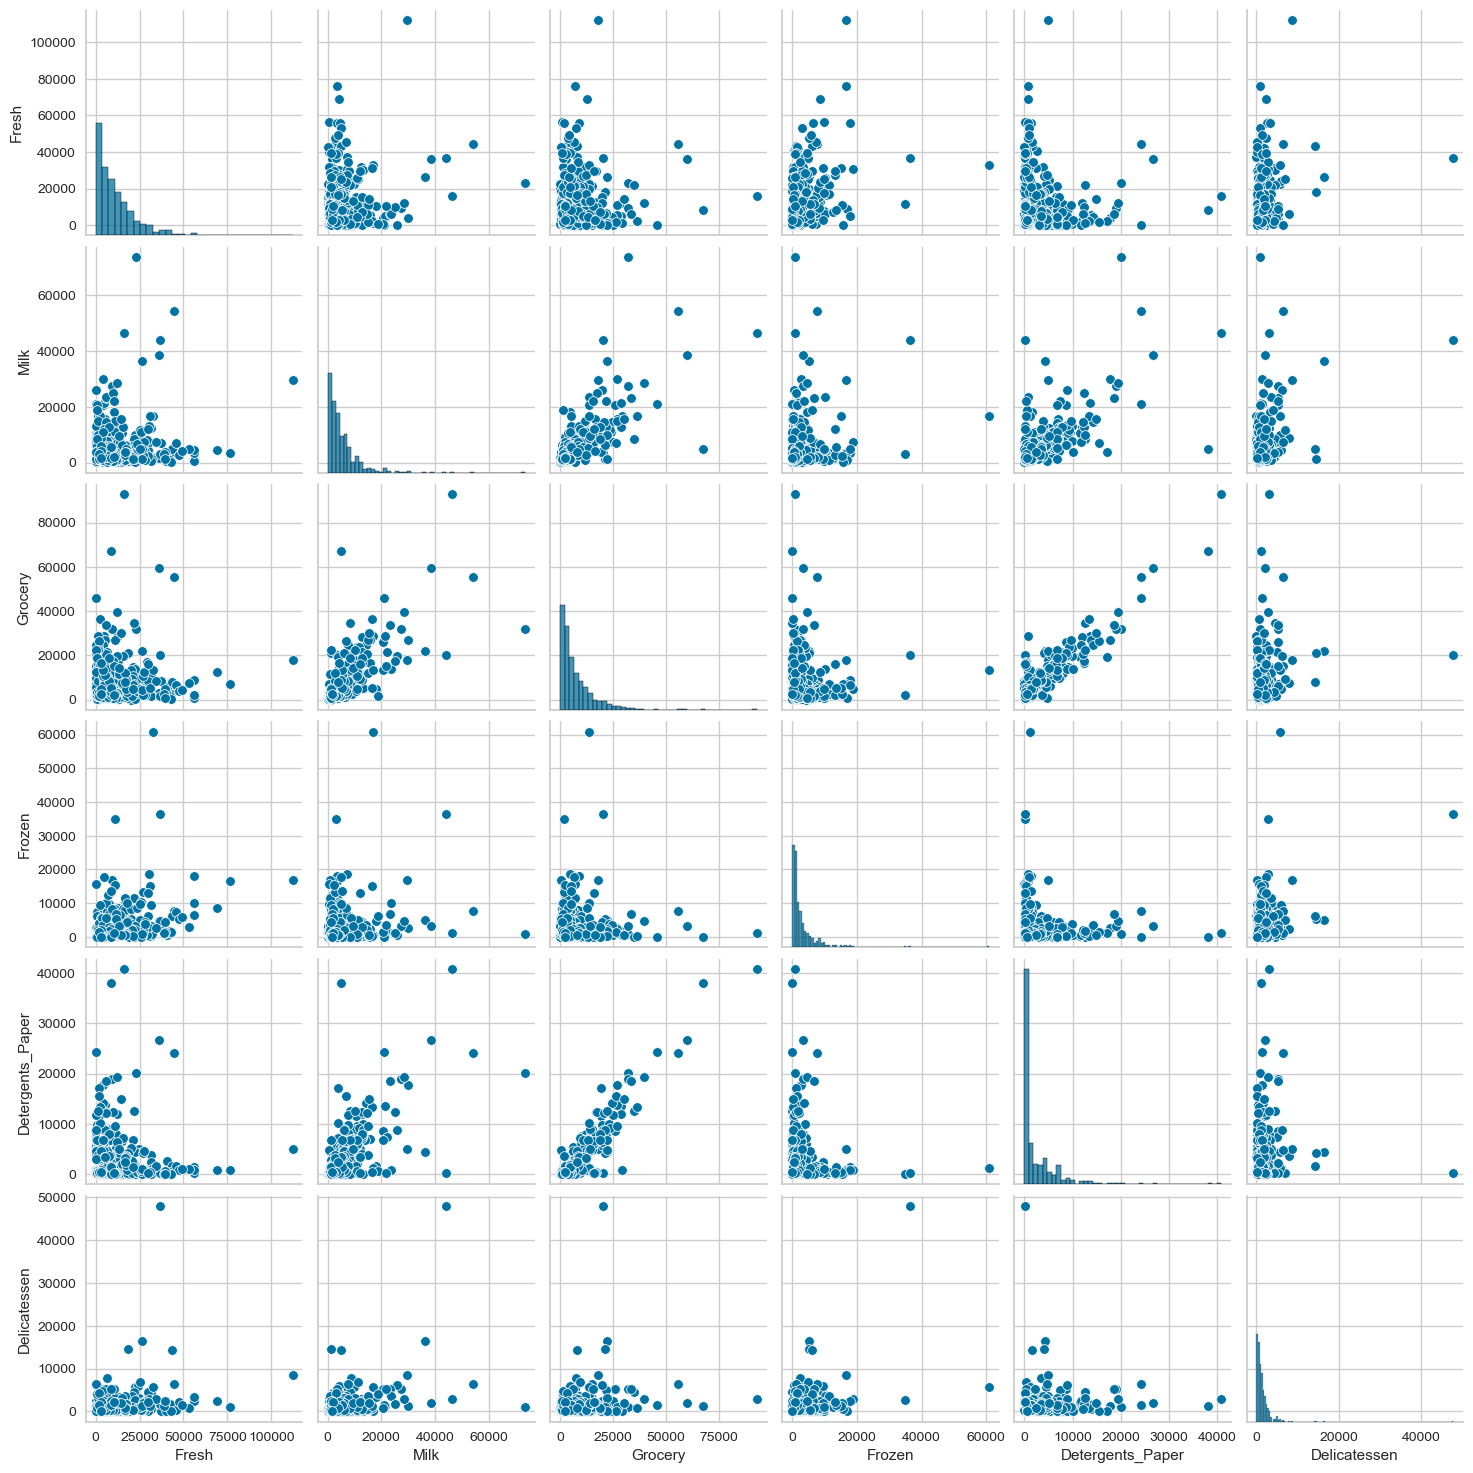

In [17]:
# Matrice de visualisation

sns.pairplot(df)

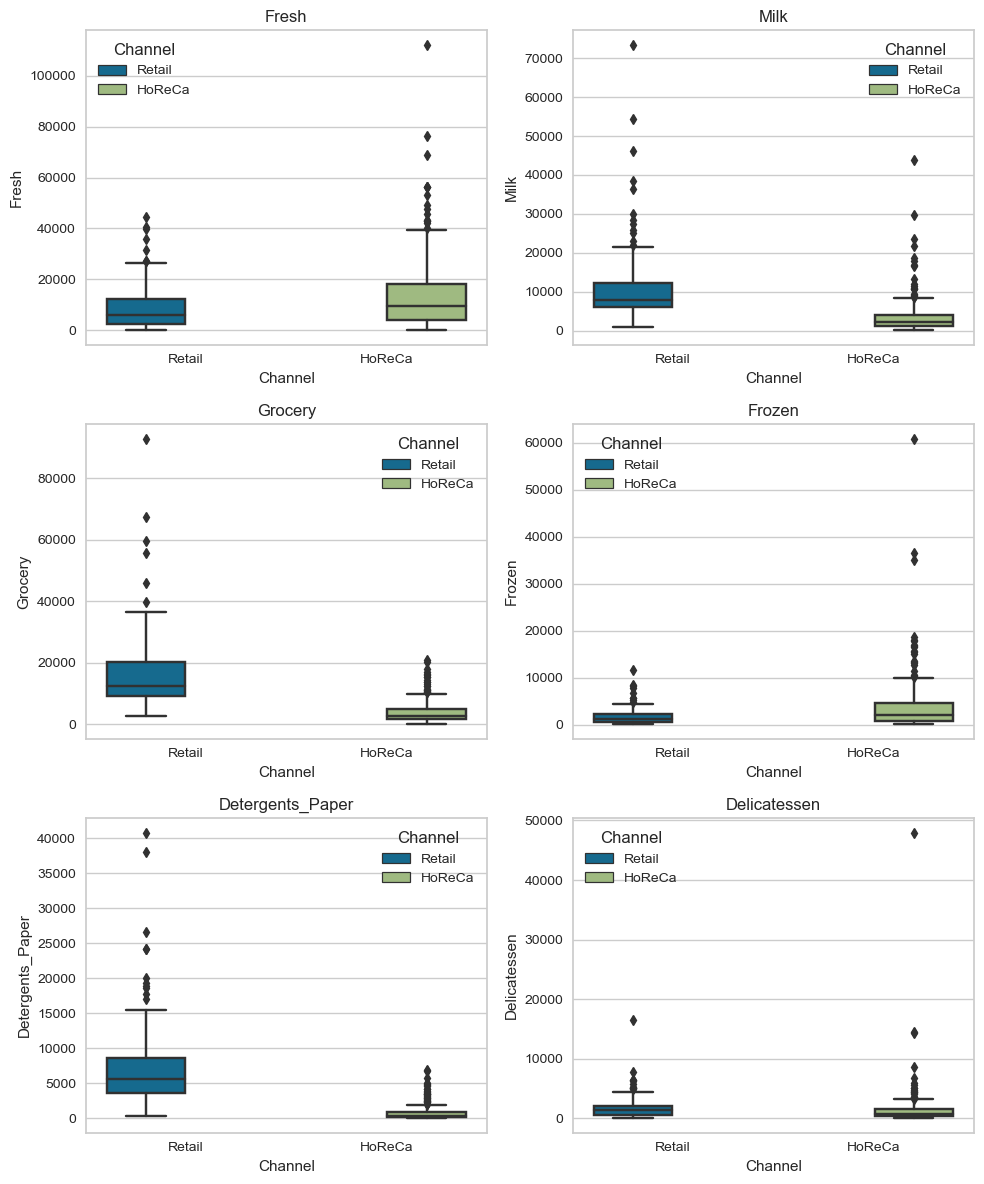

In [18]:
# Sélectionner uniquement les colonnes numériques
df_numeric = df.select_dtypes(include=[np.number])

# Ajouter le type de publication aux données numériques
df_numeric['Channel'] = df['Channel']

# Créer un boxplot pour chaque colonne numérique
num_cols = len(df_numeric.columns) - 1  # -1 pour exclure 'status_type'

# Nombre de lignes pour les sous-graphiques
num_rows = num_cols // 2
if num_cols % 2:
    num_rows += 1

plt.figure(figsize=(10, 4 * num_rows))
for i, column in enumerate(df_numeric.columns.drop('Channel'), start=1):
    plt.subplot(num_rows, 2, i)
    sns.boxplot(x='Channel', y=column, hue='Channel', data=df_numeric)
    plt.title(column)

plt.tight_layout()
plt.show()

# Analyse en Composante Principales

## ACP linéaire

In [19]:
df.head(2)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Retail,Other,12669,9656,7561,214,2674,1338
1,Retail,Other,7057,9810,9568,1762,3293,1776


In [20]:
# Dataframe des variables numériques de df

data = df.drop(['Channel', 'Region'], axis = 1)
data.head(2)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776


In [21]:
# Standardisation

scaler = StandardScaler()

data = scaler.fit_transform(data)

type(data)

numpy.ndarray

In [22]:
# Affichage de data

data

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [23]:
# Sauvegarde du tableau numy data

np.save("training_data.npy", data)

In [24]:
# Application de l'ACP 

pca = PCA()
res_pca = pca.fit_transform(data)

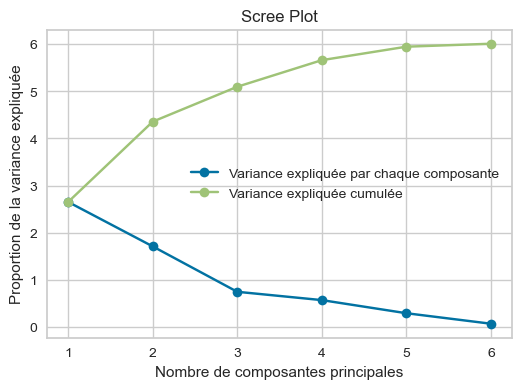

In [25]:
# Calculer la variance expliquée cumulée
explained_variance = pca.explained_variance_

cumulative_explained_variance = np.cumsum(explained_variance)

# Créer un scree plot avec la variance expliquée cumulée
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, 'o-', label='Variance expliquée par chaque composante')
plt.plot(range(1, len(explained_variance) + 1), cumulative_explained_variance, 'o-', label='Variance expliquée cumulée')
plt.title('Scree Plot')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Proportion de la variance expliquée')
plt.legend()
plt.show()

In [26]:
# Affichage du résultat

type(res_pca)
print(res_pca)

[[ 0.19329055 -0.30509996  0.14087845 -0.48643154  0.49528148 -0.00741414]
 [ 0.4344199  -0.32841262 -0.31900662 -0.17883036  0.36557931  0.05457185]
 [ 0.81114323  0.8150957  -1.52341562 -1.25408154 -0.37905353 -0.27753858]
 ...
 [ 3.46570362 -1.03983801  0.71316141  0.0334078  -0.53876786 -0.08534909]
 [-0.91802273 -0.03004659 -0.25840805 -0.52457824 -0.09321487 -0.028943  ]
 [-1.10513709 -0.86133787 -0.30515404 -0.11437678  0.10990335  0.02897846]]


In [27]:

# Calcul du cosinus carré des variables
cos_squared = np.square(pca.components_)

# Création d'un dataframe pandas avec le cosinus carré des variables
df_cos_squared = pd.DataFrame(cos_squared, columns=['PC{}'.format(i+1) for i in range(res_pca.shape[1])])
df_cos_squared.index = df.columns[2:]

print(df_cos_squared)

                       PC1       PC2       PC3       PC4       PC5       PC6
Fresh             0.001839  0.297154  0.335538  0.002620  0.301006  0.061843
Milk              0.278712  0.006917  0.021342  0.373660  0.065144  0.254225
Grocery           0.659761  0.003647  0.011747  0.031822  0.018548  0.274476
Frozen            0.056020  0.007602  0.011233  0.590873  0.029496  0.304775
Detergents_Paper  0.002370  0.683233  0.099225  0.000780  0.115355  0.099036
Delicatessen      0.001298  0.001447  0.520915  0.000245  0.470450  0.005645


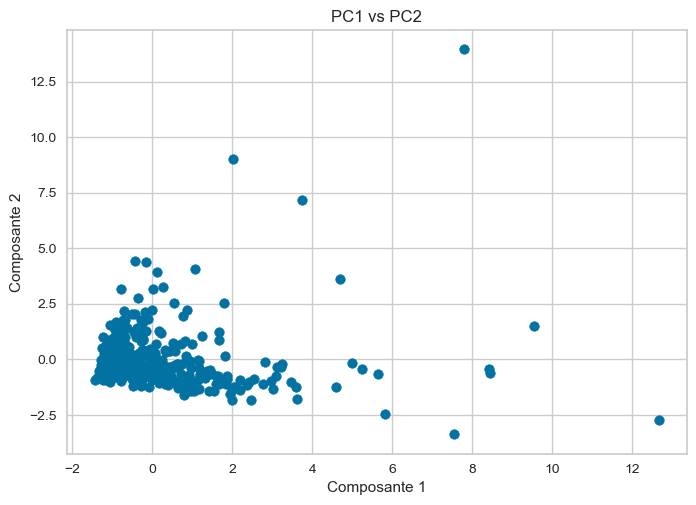

In [28]:
# Visualisation des composantes principales

plt.scatter(res_pca[:, 0], res_pca[:, 1])
plt.xlabel("Composante 1")
plt.ylabel("Composante 2")
plt.title("PC1 vs PC2")
plt.show()

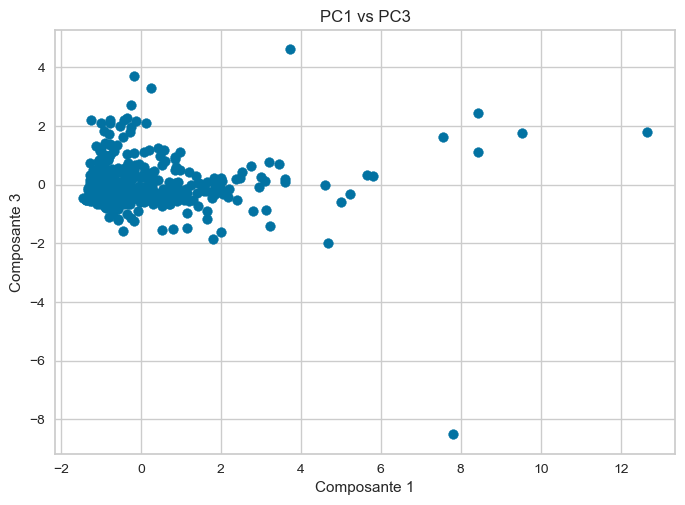

In [29]:
# Visualisation des composantes principales

plt.scatter(res_pca[:, 0], res_pca[:, 2])
plt.xlabel("Composante 1")
plt.ylabel("Composante 3")
plt.title("PC1 vs PC3")
plt.show()

Text(0.5, 1.0, 'PC2 vs PC3')

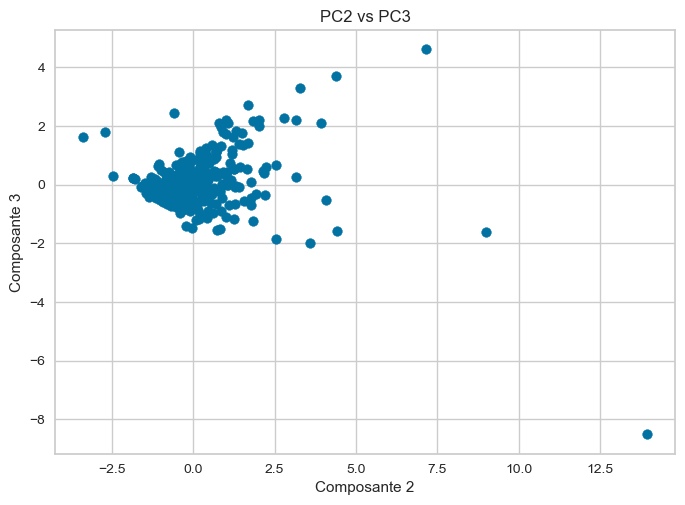

In [30]:
# Visualisation des composantes principales

plt.scatter(res_pca[:, 1], res_pca[:, 2])
plt.xlabel("Composante 2")
plt.ylabel("Composante 3")
plt.title("PC2 vs PC3")

In [31]:
# Coefficient de corrélation de Pearson après l'ACP

pearsonr(res_pca[:, 0], res_pca[:, 1])

PearsonRResult(statistic=2.474149357611921e-16, pvalue=0.9999999999999947)

In [32]:
pearsonr(res_pca[:, 1], res_pca[:, 2])

PearsonRResult(statistic=-1.468009741545373e-16, pvalue=0.9999999999999947)

In [33]:
pearsonr(res_pca[:, 0], res_pca[:, 2])

PearsonRResult(statistic=-3.43908929112402e-16, pvalue=0.9999999999999936)

pas de corrélation linéaire entre les différentes composantes

# ACP non-linéaire

In [34]:
# Chargement des données d'entrainement précédemment sauvegardé : 'training_data.npy'

data = np.load('training_data.npy')

In [35]:
# KPCA avec noyau 'rbf'

kpca = KernelPCA(n_components = 2, kernel = 'rbf')
res_kpca_rbf = kpca.fit_transform(data)
type(res_kpca_rbf)

numpy.ndarray

In [36]:
res_kpca_rbf

array([[ 7.83737059e-02, -1.73114604e-01],
       [ 1.85812546e-01, -3.07414714e-01],
       [ 3.41701538e-01,  7.50477517e-02],
       [-2.53303524e-01,  2.50352426e-01],
       [ 1.36616714e-01,  3.75279235e-01],
       [-8.89533043e-02, -2.12264712e-01],
       [-1.43530413e-01, -1.66305893e-01],
       [ 4.08969858e-02, -2.62715599e-01],
       [-2.20484030e-01, -3.05157788e-01],
       [ 7.08968837e-01, -2.91192502e-01],
       [ 3.19740641e-01, -3.06524578e-01],
       [-3.55451826e-01,  1.38748032e-02],
       [ 3.85446545e-01,  3.35728837e-01],
       [ 3.89500601e-01,  5.93738133e-02],
       [ 3.55511167e-01,  1.44217785e-01],
       [-3.54355200e-01, -1.10218594e-01],
       [ 3.22635645e-01, -4.72218998e-01],
       [-7.00024990e-02, -9.03504726e-02],
       [ 1.16541919e-01,  1.17853125e-01],
       [-1.20227554e-01, -2.83548201e-01],
       [-1.46900211e-01,  9.95711390e-02],
       [-3.99510714e-01, -9.26408202e-02],
       [ 2.04359988e-01,  6.35635926e-01],
       [ 3.

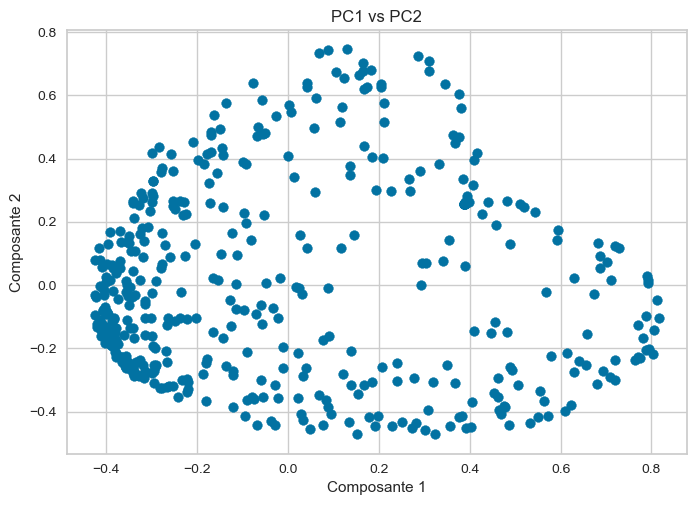

In [37]:
# Visualisation des composantes principales

plt.scatter(res_kpca_rbf[:, 0], res_kpca_rbf[:, 1])
plt.xlabel("Composante 1")
plt.ylabel("Composante 2")
plt.title("PC1 vs PC2")
plt.show()

À l’origine, le DataFrame ne présente pas de séparation linéaire claire entre les groupes. Il n’est donc pas surprenant qu’une ACP non linéaire offre une meilleure représentation graphique, notamment en ce qui concerne la corrélation entre les composantes principales.

In [38]:
# Coefficient de corrélation de Pearson après l'ACP

pearsonr(res_kpca_rbf[:, 0], res_kpca_rbf[:, 1])

PearsonRResult(statistic=-5.334274688628682e-17, pvalue=1.0)

J'ai fais un test de pearson bien qu'il n'est généralement pas pertinent de calculer le coefficient de corrélation de Pearson dans le cadre d’une ACP non linéaire.

En effet, ACP non linéaire = structure non linéaire

Une ACP non linéaire cherche à préserver des structures complexes et non linéaires entre les points.

Les nouvelles composantes ne sont pas des combinaisons linéaires des variables d’origine.

Donc : il n’est pas cohérent d’analyser la corrélation linéaire (Pearson) entre les composantes non linéaires et les variables originales.

In [39]:
from scipy.stats import spearmanr

# Coefficient de corrélation de Spearman entre les deux premières composantes de l'ACP non linéaire
corr_spearman, p_value = spearmanr(res_kpca_rbf[:, 0], res_kpca_rbf[:, 1])

print("Coefficient de Spearman :", round(corr_spearman, 4))
print("P-value :", round(p_value, 4))


Coefficient de Spearman : -0.0125
P-value : 0.7938


**Corrélation de –0,0125 :**
Ce coefficient est très proche de 0, ce qui indique quasiment aucune relation monotone entre la 1ʳᵉ et la 2ᵉ composante non linéaire de ton ACP.

**P-value de 0,79 :**
La p-value est très élevée (> 0,05), donc la corrélation n’est pas statistiquement significative.

Autrement dit : cette absence de relation n’est pas due au hasard, mais reflète probablement une réalité de la structure des données.


Les deux premières composantes issues de l'ACP non linéaire ne semblent pas liées, même de façon monotone. C’est plutôt une bonne chose, car cela signifie qu’elles capturent probablement des dimensions d’information différentes, donc complémentaires.


In [40]:
# Ajout des composantes principales comme colonne de df

df['x_kpca_rbf'] = res_kpca_rbf[:,0]
df['y_kpca_rbf'] = res_kpca_rbf[:,1]

In [41]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,x_kpca_rbf,y_kpca_rbf
0,Retail,Other,12669,9656,7561,214,2674,1338,0.078374,-0.173115
1,Retail,Other,7057,9810,9568,1762,3293,1776,0.185813,-0.307415
2,Retail,Other,6353,8808,7684,2405,3516,7844,0.341702,0.075048
3,HoReCa,Other,13265,1196,4221,6404,507,1788,-0.253304,0.250352
4,Retail,Other,22615,5410,7198,3915,1777,5185,0.136617,0.375279


## Bilan 


L’ACP linéaire ne révèle pas de structure claire dans les données : les points sont concentrés sans séparation évidente. En revanche, l’ACP non linéaire (avec noyau RBF) met en évidence des formes plus complexes et des structures circulaires, suggérant la présence de relations non linéaires entre les variables. Cela montre que l’ACP non linéaire semble plus adaptée ici pour réduire la dimension tout en conservant la structure des données. Elle offre également une meilleure base pour un éventuel clustering.

# Clustering K-means

In [42]:
# clustering avec 5 clusters

cluster_model = KMeans(n_clusters = 5)
cluster_model.fit(res_kpca_rbf)
clusters = cluster_model.predict(res_kpca_rbf)

In [43]:
# Affichage des clusters

clusters

array([3, 3, 0, 1, 4, 3, 3, 3, 3, 2, 2, 1, 0, 0, 0, 1, 2, 3, 0, 3, 1, 1,
       4, 0, 0, 3, 1, 1, 0, 4, 4, 3, 1, 4, 3, 3, 4, 2, 2, 0, 4, 4, 2, 2,
       3, 0, 2, 0, 3, 0, 1, 3, 4, 2, 4, 3, 0, 2, 1, 3, 3, 0, 3, 2, 1, 0,
       3, 0, 3, 1, 4, 0, 1, 4, 3, 4, 1, 2, 1, 3, 1, 2, 2, 4, 3, 0, 0, 0,
       4, 4, 1, 4, 0, 0, 2, 3, 3, 1, 1, 1, 2, 2, 3, 0, 1, 1, 2, 2, 3, 2,
       1, 2, 4, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 3, 4, 0, 4, 0, 3, 4, 1, 1,
       1, 1, 1, 1, 3, 3, 1, 3, 1, 4, 4, 1, 1, 0, 1, 1, 1, 4, 1, 3, 1, 3,
       1, 2, 2, 1, 3, 2, 3, 1, 1, 2, 3, 2, 2, 3, 1, 1, 2, 0, 3, 2, 3, 2,
       4, 1, 1, 1, 3, 0, 2, 0, 3, 1, 1, 3, 2, 2, 4, 1, 1, 2, 1, 4, 0, 3,
       1, 1, 2, 2, 0, 3, 3, 2, 1, 3, 3, 2, 1, 0, 1, 3, 2, 2, 0, 1, 2, 1,
       1, 3, 1, 1, 1, 1, 4, 1, 3, 1, 4, 3, 4, 3, 1, 3, 1, 4, 1, 4, 4, 4,
       1, 1, 3, 2, 1, 1, 1, 1, 1, 0, 1, 0, 0, 4, 1, 1, 0, 0, 1, 1, 4, 3,
       2, 0, 2, 4, 2, 1, 1, 3, 3, 4, 3, 1, 4, 4, 1, 3, 3, 3, 4, 4, 0, 4,
       1, 4, 1, 4, 3, 1, 3, 2, 4, 3, 1, 3, 3, 3, 3,

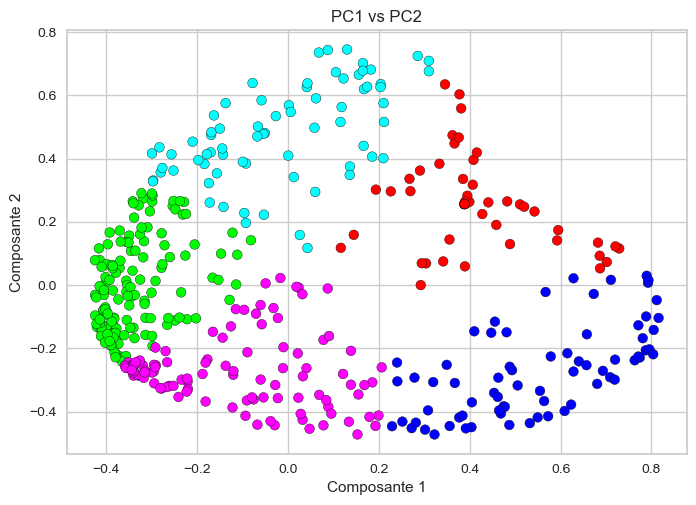

In [44]:
#visualisation des clusters

vivid_colors = ['#FF0000', '#00FF00', '#0000FF', '#FF00FF', '#00FFFF', '#FFA500']  # rouge, vert, bleu, magenta, cyan, orange
plt.scatter(
    res_kpca_rbf[:, 0], res_kpca_rbf[:, 1],
    c=[vivid_colors[i] for i in clusters],
    edgecolor='k'
)
plt.xlabel("Composante 1")
plt.ylabel("Composante 2")
plt.title("PC1 vs PC2")
plt.show()


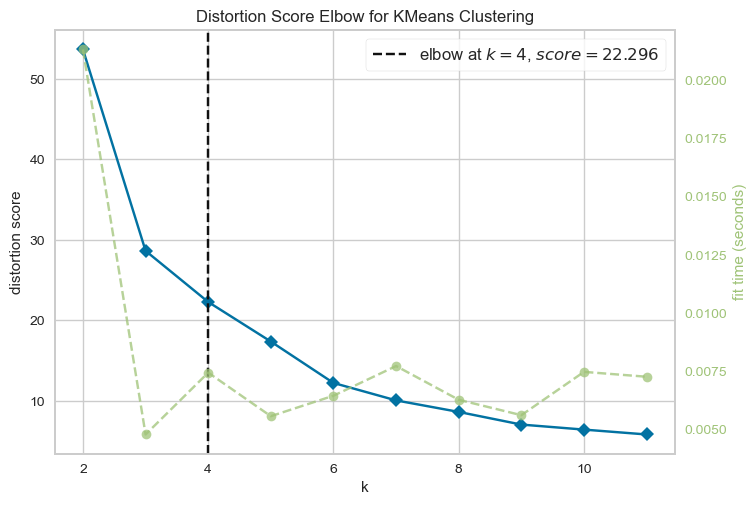

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [45]:
# Méthode du code

kmeans = KMeans()
    
visualizer = KElbowVisualizer(kmeans, k = (2, 12))
visualizer.fit(res_kpca_rbf)
visualizer.show()

In [46]:
# Ajout des clusters à df et sauvegarde au format csv

df['cluster_kpca_rbf'] = clusters
df.to_csv('data_with_clusters.csv')

Analysons les résultats de la segmentation

In [47]:
# Chargement des données

df = pd.read_csv('data_with_clusters.csv', index_col = 0)

In [48]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,x_kpca_rbf,y_kpca_rbf,cluster_kpca_rbf
0,Retail,Other,12669,9656,7561,214,2674,1338,0.078374,-0.173115,3
1,Retail,Other,7057,9810,9568,1762,3293,1776,0.185813,-0.307415,3
2,Retail,Other,6353,8808,7684,2405,3516,7844,0.341702,0.075048,0
3,HoReCa,Other,13265,1196,4221,6404,507,1788,-0.253304,0.250352,1
4,Retail,Other,22615,5410,7198,3915,1777,5185,0.136617,0.375279,4


In [49]:
df['cluster_kpca_rbf'].unique()

array([3, 0, 1, 4, 2])

Pour améliorer les performances d'une campagne marketing, les commerciaux n'ont pas besoin en realité de connaître chaque client d'un cluster. Si dans l'entreprise, on a que 10 clients ok mais si on a une société avec 10 millions de clients, connaître une societé avec un tel nombre de clients est illusoire.
Donc il suffit de connaître les **caractéristiques du centroïde de chaque cluster**, du représentant d'un cluster.
Car le clustering c'est quoi ?
c'est regrouper les individus de caractéristique similaire en 1 groupe etles clusters sont distinct les uns par rapport aux autres, de plus, à l'intérieur d'un cluster, toutes les personnes se ressembles où ont presques les mêmes caractéristiques. Donc si on arrive à connaître les caractéristiques du représentantt, ça sous entend qu'pn connaît les caractéristiques de tout les membres de ce cluster et c'est ce représentant qu'on appel **centroïdes** et lui, ses caractéristiques sont rien d'autre que les caractéristiques moyennes du groupe.

In [50]:
# Centroïdes

# Étape 1 : garder seulement les colonnes numériques parmi les features
numeric_features = list(df[features].select_dtypes(include='number').columns)



# Étape 2 : groupby et moyenne
df.groupby('cluster_kpca_rbf')[numeric_features].mean()




,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
cluster_kpca_rbf,,,,,,
0,24431.826923,16991.788462,20472.038462,7583.884615,7895.634615,4644.096154
1,9784.112676,1876.471831,2518.880282,2557.119718,465.133803,777.464789
2,4172.774648,9754.197183,16540.000000,1308.211268,7532.338028,1303.211268
3,4778.611650,4564.941748,6117.834951,1140.203883,2051.728155,1120.126214
4,25442.611111,3299.833333,3775.805556,5331.291667,626.541667,1543.736111


In [51]:

#groupby et moyenne
df.groupby(['cluster_kpca_rbf', 'Channel', 'Region'])[numeric_features].mean()


Fresh          Milk       Grocery  \
cluster_kpca_rbf Channel Region                                             
0                HoReCa  Lisbon  30132.714286  11096.857143   8465.714286   
                         Other   39745.500000  12072.857143  10300.500000   
                         Porto   16360.000000   8558.500000  10323.500000   
                 Retail  Lisbon   6928.333333  22686.000000  36588.666667   
                         Other   17572.956522  22384.000000  27605.782609   
                         Porto   15135.333333  12289.333333  31911.000000   
1                HoReCa  Lisbon  10060.200000   1966.233333   2400.333333   
                         Other    9499.688172   1855.612903   2284.333333   
                         Porto   10201.333333   1536.266667   3612.066667   
                 Retail  Lisbon   2790.000000   2527.000000   5265.000000   
                         Other   16085.666667   3109.666667   4594.000000   
2                HoReCa  Lisbon   2806.000000  10765.000000  15538.000000   
                         Other    6094.666667   7715.333333  12687.000000   
                 Retail  Lisbon   3320.300000   9978.300000  18615.700000   
                         Other    4447.413043   9520.086957  16334.891304   
                         Porto    3399.363636  10993.636364  16652.636364   
3                HoReCa  Lisbon   2365.846154   4943.692308   5173.846154   
                         Other    2958.180000   3927.260000   4917.060000   
                         Porto    3460.400000   1901.200000   4742.200000   
                 Retail  Lisbon   2484.000000   5917.000000   8240.000000   
                         Other    8702.689655   5942.034483   8561.655172   
                         Porto    9721.000000   3974.750000   7136.250000   
4                HoReCa  Lisbon  26867.000000   2080.500000   2934.250000   
                         Other   25924.862745   3424.549020   3520.333333   
                         Porto   20528.833333   2475.333333   4089.166667   
                 Retail  Lisbon  15927.000000   5955.000000   7413.500000   
                         Other   30728.500000   4650.500000   6685.500000   
                         Porto   16823.000000    928.000000   2743.000000   

                                       Frozen  Detergents_Paper  Delicatessen  
cluster_kpca_rbf Channel Region                                                
0                HoReCa  Lisbon   6926.142857        783.428571   3165.857143  
                         Other   14933.214286       1184.428571   7983.857143  
                         Porto   38235.000000        643.500000   3079.500000  
                 Retail  Lisbon   3887.000000      17104.000000   2888.333333  
                         Other    2002.565217      12229.869565   3815.434783  
                         Porto     874.666667      18207.000000   1659.666667  
1                HoReCa  Lisbon   2849.066667        496.633333    790.000000  
                         Other    2323.935484        415.956989    746.086022  
                         Porto    3490.400000        471.133333    844.333333  
                 Retail  Lisbon   5612.000000        788.000000   1360.000000  
                         Other    1181.666667       1537.000000   1096.333333  
2                HoReCa  Lisbon   1374.000000       5828.000000   2388.000000  
                         Other    1203.000000       6268.000000   1147.666667  
                 Retail  Lisbon   1508.800000       8280.200000   1839.200000  
                         Other    1333.782609       7296.521739   1240.347826  
                         Porto    1041.636364       8338.363636   1022.636364  
3                HoReCa  Lisbon   1294.692308       2053.692308    736.307692  
                         Other    1116.740000       1229.920000   1245.100000  
                         Porto     617.000000        630.600000    765.000000  
                 Retail  Lisbon   2036.500000    

In [52]:

#groupby et moyenne
df.groupby(['cluster_kpca_rbf', 'Region'])[numeric_features].mean()

Fresh          Milk       Grocery  \
cluster_kpca_rbf Region                                             
0                Lisbon  23171.400000  14573.600000  16902.600000   
                 Other   25962.567568  18482.486486  21057.837838   
                 Porto   15625.200000  10797.000000  23276.000000   
1                Lisbon   9825.677419   1984.322581   2492.741935   
                 Other    9705.500000   1894.802083   2356.510417   
                 Porto   10201.333333   1536.266667   3612.066667   
2                Lisbon   3273.545455  10049.818182  18335.909091   
                 Other    4548.265306   9409.591837  16111.551020   
                 Porto    3399.363636  10993.636364  16652.636364   
3                Lisbon   2381.600000   5073.466667   5582.666667   
                 Other    5066.924051   4666.860759   6254.949367   
                 Porto    6242.888889   2822.777778   5806.222222   
4                Lisbon  24679.000000   2855.400000   3830.100000   
                 Other   26274.218182   3513.709091   3750.527273   
                 Porto   19999.428571   2254.285714   3896.857143   

                               Frozen  Detergents_Paper  Delicatessen  
cluster_kpca_rbf Region                                                
0                Lisbon   6014.400000       5679.600000   3082.600000  
                 Other    6895.243243       8050.513514   5392.675676  
                 Porto   15818.800000      11181.600000   2227.600000  
1                Lisbon   2938.193548        506.032258    808.387097  
                 Other    2288.239583        450.989583    757.031250  
                 Porto    3490.400000        471.133333    844.333333  
2                Lisbon   1496.545455       8057.272727   1889.090909  
                 Other    1325.775510       7233.551020   1234.673469  
                 Porto    1041.636364       8338.363636   1022.636364  
3                Lisbon   1393.600000       2421.866667    744.000000  
                 Other    1136.987342       2009.202532   1222.291139  
                 Porto     746.111111       1808.111111    850.222222  
4                Lisbon   4243.200000        669.500000   1650.100000  
                 Other    5471.127273        655.909091   1506.290909  
                 Porto    5787.000000        334.428571   1686.000000

L'equipe marketing peut utiliser ce genre de tableau là pour concevoir sa campagne marketing de manière à ce qu'elle soit performante. Donc là ils auront une idée des choses pour allouer convenablement les ressources marketing.